In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import data_util  
yf.pdr_override()

sns.set(rc={'figure.figsize':(20, 15)})

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))

import warnings
warnings.filterwarnings('ignore')


In [5]:
apple_stocks=data_util.stock_data('AAPL', 4,'Apple')

[*********************100%%**********************]  1 of 1 completed


In [8]:
def time_series_cross_validation(df,one_hot_encodings,p):

  # test_percentage = [0.2,0.4,0.6,0.8] #these represent the split between the train and test
    row = int(df.shape[0]*p)
    val_row = int( (df.shape[0]-row)*0.5) + row

    #create the training and validation dataset
    x_train = temp[:row]
    y_train = one_hot_encodings[:row]

    x_val = temp[row:val_row]
    y_val = one_hot_encodings[row:val_row]

    x_test = temp[val_row:]
    y_test = one_hot_encodings[val_row:]

    return x_train,y_train,x_val,y_val,x_test,y_test

def time_series_cross_validation_regression(df,x,y,p):

  # test_percentage = [0.2,0.4,0.6,0.8] #these represent the split between the train and test
    row = int(df.shape[0]*p)
    val_row = int( (df.shape[0]-row)*0.5) + row

    #create the training and validation dataset
    x_train = x[:row]
    y_train = y[:row]

    x_val = x[row:val_row]
    y_val = y[row:val_row]

    x_test = x[val_row:]
    y_test = y[val_row:]

    return x_train,y_train,x_val,y_val,x_test,y_test

In [9]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

regression = LinearRegression()

def Linear_Regression(apple_stocks, x_train, y_train, x_val, y_val, x_test, y_test):
    regression.fit(x_train, y_train)
    test_predictions = regression.predict(x_test)
    val_predictions = regression.predict(x_val)
    test_vs_testpred = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': test_predictions})
    val_vs_valpred = pd.DataFrame({'Actual_Price': y_val, 'Predicted_Price': val_predictions})

    print(regression.coef_)

    # Print MSE and summary statistics
    print('MSE for the Test Set:', metrics.mean_squared_error(y_test, test_predictions))
    print("Test Predictions - ")
    print(test_vs_testpred.describe())

    print('MSE for the Val Set:', metrics.mean_squared_error(y_val, val_predictions))
    print("Val Predictions - ")
    print(val_vs_valpred.head(10))

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Actual_Price', y='Predicted_Price', data=test_vs_testpred)
    plt.title('Test Set: Actual vs Predicted Price')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Actual_Price', y='Predicted_Price', data=val_vs_valpred)
    plt.title('Validation Set: Actual vs Predicted Price')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming x_train, y_train, x_val, y_val, x_test, y_test are prepared
# Logistic_Regression(apple_stocks, x_train, y_train, x_val, y_val, x_test, y_test)


Train - Test Split :  20.0 - 80.0
[-5.19363695e-01  8.73394540e-01  6.43182369e-01 -1.16197607e-09]
MSE for the Test Set: 0.7763138401649315
Test Predictions - 
       Actual_Price  Predicted_Price
count    403.000000       403.000000
mean     169.382953       169.372160
std       18.497080        18.395113
min      125.019997       125.929095
25%      152.729996       152.277527
50%      173.229996       173.036177
75%      184.040001       183.760399
max      198.110001       197.804438
MSE for the Val Set: 1.1053391982517637
Val Predictions - 
            Actual_Price  Predicted_Price
Date                                     
2021-03-01    127.790001       126.516149
2021-03-02    125.120003       126.230083
2021-03-03    122.059998       123.419545
2021-03-04    120.129997       121.019142
2021-03-05    121.419998       119.322215
2021-03-08    116.360001       117.651754
2021-03-09    121.089996       121.252630
2021-03-10    119.980003       120.412123
2021-03-11    121.959999   

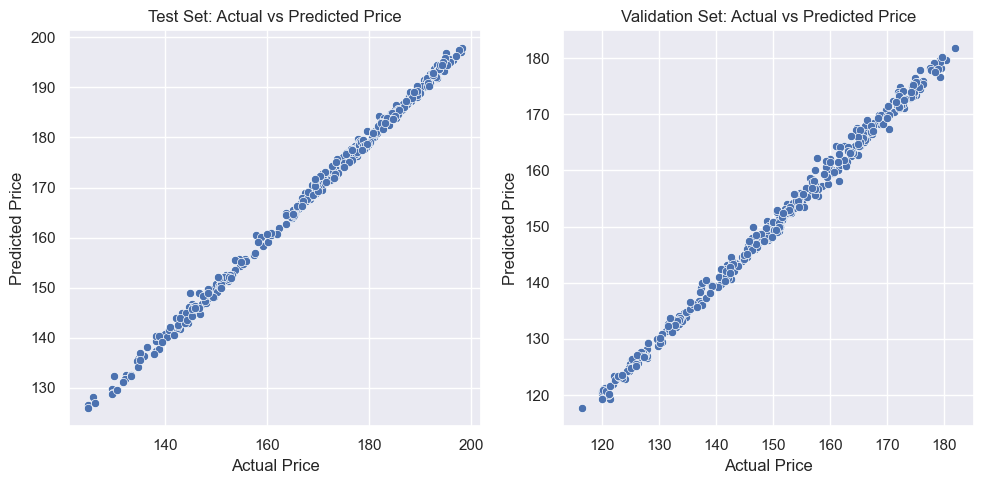

Train - Test Split :  40.0 - 60.0
[-5.85857547e-01  9.07327624e-01  6.74316893e-01 -1.76202941e-09]
MSE for the Test Set: 0.6666696438659969
Test Predictions - 
       Actual_Price  Predicted_Price
count    303.000000       303.000000
mean     178.098383       178.017056
std       11.333246        11.217748
min      145.309998       145.705125
25%      170.750000       171.178438
50%      178.190002       178.150563
75%      187.544998       187.072866
max      198.110001       197.721281
MSE for the Val Set: 1.3498120784544052
Val Predictions - 
            Actual_Price  Predicted_Price
Date                                     
2021-12-14    174.330002       174.931221
2021-12-15    179.300003       176.692212
2021-12-16    172.259995       174.651577
2021-12-17    171.139999       172.375647
2021-12-20    169.750000       169.371350
2021-12-21    172.990005       170.975034
2021-12-22    175.639999       174.562969
2021-12-23    176.279999       175.960736
2021-12-27    180.330002   

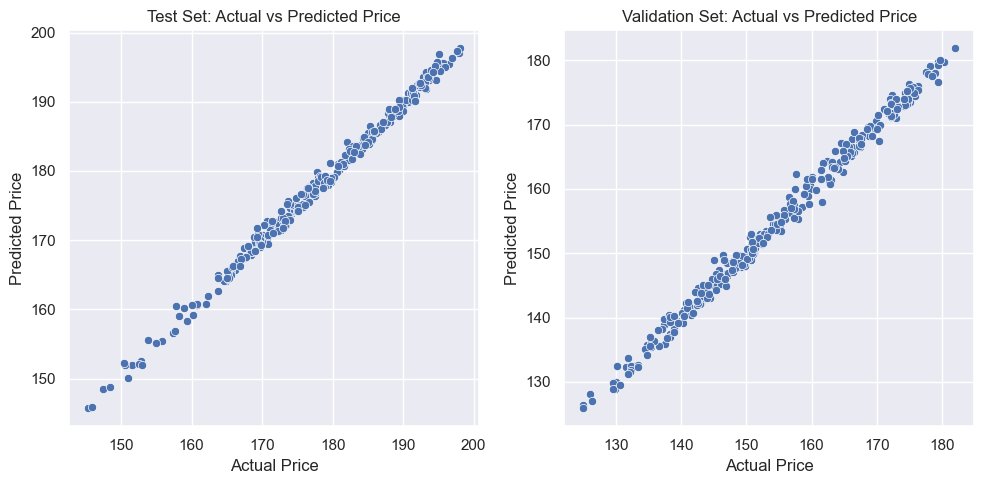

Train - Test Split :  60.0 - 40.0
[-6.96057072e-01  8.86997778e-01  8.07090638e-01  5.36689138e-10]
MSE for the Test Set: 0.6468319187153946
Test Predictions - 
       Actual_Price  Predicted_Price
count    202.000000       202.000000
mean     181.059802       180.952747
std        8.662444         8.514811
min      165.000000       164.501229
25%      173.675003       173.689934
50%      180.450005       180.053862
75%      188.552505       188.629303
max      198.110001       197.716687
MSE for the Val Set: 0.8410246284698908
Val Predictions - 
            Actual_Price  Predicted_Price
Date                                     
2022-10-04    146.100006       145.358337
2022-10-05    146.399994       146.042117
2022-10-06    145.429993       146.750629
2022-10-07    140.089996       140.440968
2022-10-10    140.419998       140.127183
2022-10-11    138.979996       139.728822
2022-10-12    138.339996       139.334680
2022-10-13    142.990005       142.045440
2022-10-14    138.380005   

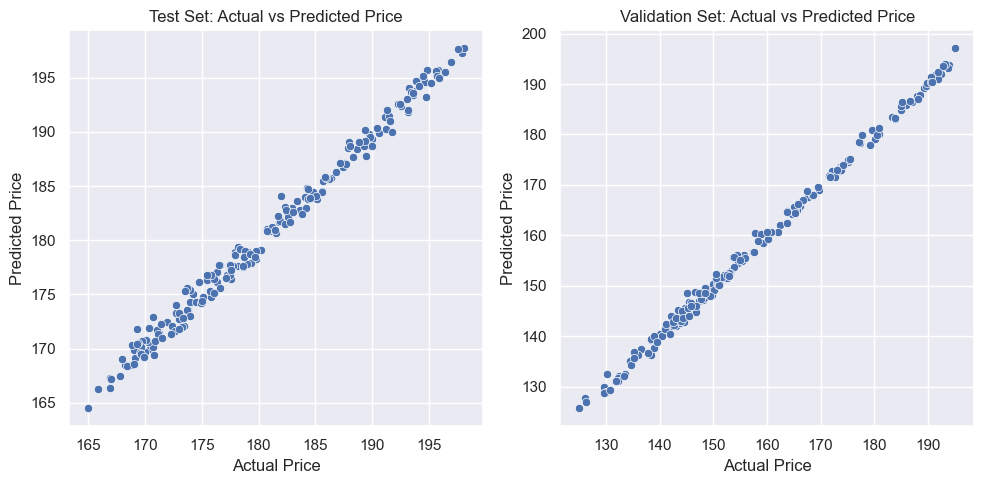

Train - Test Split :  80.0 - 19.999999999999996
[-6.75730581e-01  8.55567828e-01  8.18559034e-01  5.89750471e-10]
MSE for the Test Set: 0.6863454698864774
Test Predictions - 
       Actual_Price  Predicted_Price
count    101.000000       101.000000
mean     180.286633       180.241942
std        9.168627         8.960594
min      165.000000       164.555416
25%      171.130005       171.640459
50%      181.910004       181.778557
75%      186.860001       186.279506
max      197.570007       197.752343
MSE for the Val Set: 0.5803646147138564
Val Predictions - 
            Actual_Price  Predicted_Price
Date                                     
2023-07-25    193.619995       193.808994
2023-07-26    194.500000       194.939367
2023-07-27    193.220001       194.055779
2023-07-28    195.830002       195.782348
2023-07-31    196.449997       195.634503
2023-08-01    195.610001       195.732417
2023-08-02    192.580002       192.418490
2023-08-03    191.169998       191.415987
2023-08-04   

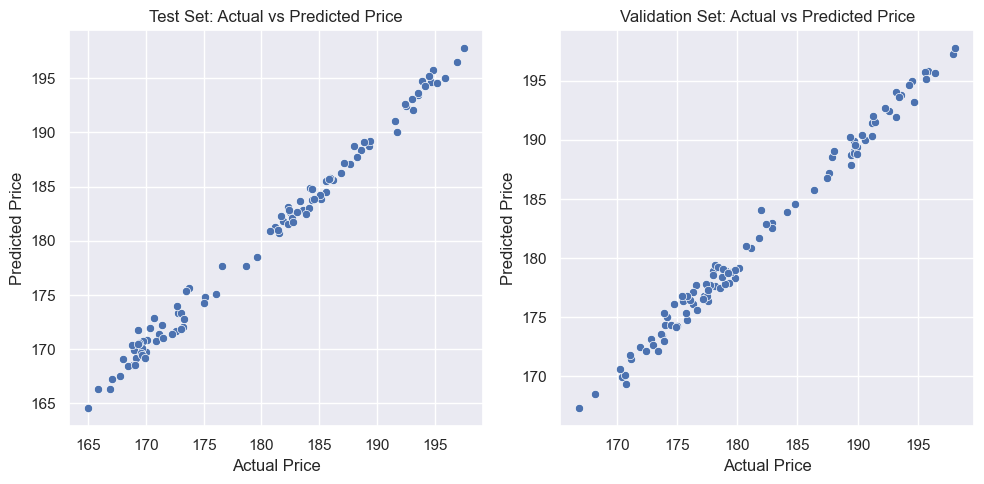

In [10]:
test_percentages = [0.2,0.4,0.6,0.8]

for p in test_percentages:

  print("Train - Test Split : ",(p)*100,"-",(1-p)*100)

  features = apple_stocks[['Open', 'High','Low', 'Volume']]
  labels = apple_stocks['Close']

  x_train,y_train,x_val,y_val,x_test,y_test = time_series_cross_validation_regression(apple_stocks,features,labels,p)

  Linear_Regression(apple_stocks,x_train,y_train,x_val,y_val,x_test,y_test)

